避免过拟合的手段

* 增加全部训练数据的数量
* 使用简单的模型
* 正则化
其中正则化是为了防止过拟合加的惩罚，使得参数的值不至于过大，让模型尽可能简单，尽量往 0 靠（L2正则化），或者干脆让某些参数为 0（L1 正则化）

In [6]:
import numpy as np
import matplotlib.pyplot as plt


## 1 Data Cleaning

In [7]:
# 真正的函数
def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

# 随意准备一些向真正的函数加入了一点噪声的训练数据
train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

# 标准化
mu = train_x.mean()
sigma = train_x.std()


def standardize(x):
    return (x - mu) / sigma


train_z = standardize(train_x)
# 创建训练数据的矩阵


def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10
    ]).T


X = to_matrix(train_z)


## 2 Modeling

In [8]:
# 参数初始化
theta = np.random.randn(X.shape[1])

# 预测函数
def f(x):
    return np.dot(x, theta)

# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 正则化常量
LAMBDA = 0.5

# 学习率
ETA = 1e-4

# 误差
diff = 1

In [9]:

# 重复学习（不应用正则化）
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * (np.dot(f(X) - train_y, X))

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

theta1 = theta

# 重复学习（应用正则化）
theta = np.random.randn(X.shape[1])
diff = 1
error = E(X, train_y)
while diff > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

theta2 = theta

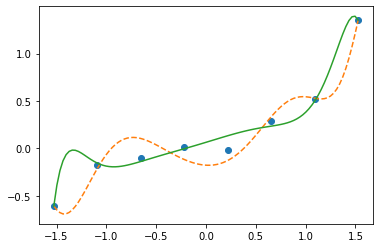

In [10]:
# 绘图确认
plt.plot(train_z, train_y, 'o')
z = standardize(np.linspace(-2, 2, 100))
theta = theta1 # 未应用正则化
plt.plot(z, f(to_matrix(z)), linestyle='dashed')
theta = theta2 # 应用正则化
plt.plot(z, f(to_matrix(z)))
plt.show()
